In [1]:
class Tensor:
    def __init__(self, data, requires_grad=False):
        self.data = data
        self.grad = None
        self.requires_grad = requires_grad
        self._backward = lambda: None
        self._prev = []
    
    def mul(self, other):
        # Forward (기존 코드 그대로)
        result_data = []
        for i in range(len(self.data)):
            row = []
            for j in range(len(self.data[0])):
                row.append(self.data[i][j] * other.data[i][j])
            result_data.append(row)
        
        out = Tensor(result_data)
        out._prev = [self, other]  # 부모 기록
        
        # Backward 정의
        def _backward():
            # grad 초기화 (None이면)
            if self.grad is None:
                self.grad = [[0.0] * len(self.data[0]) for _ in range(len(self.data))]
            if other.grad is None:
                other.grad = [[0.0] * len(other.data[0]) for _ in range(len(other.data))]
            
            # Chain rule 적용
            for i in range(len(self.data)):
                for j in range(len(self.data[0])):
                    self.grad[i][j] += out.grad[i][j] * other.data[i][j]
                    other.grad[i][j] += out.grad[i][j] * self.data[i][j]
        
        out._backward = _backward
        return out
    
    def backward(self):
        # 시작점: grad = 1로 초기화
        if self.grad is None:
            self.grad = [[1.0] * len(self.data[0]) for _ in range(len(self.data))]
        
        # 내 _backward 실행
        self._backward()
        
        # 부모들에게 전파 (도미노!)
        for parent in self._prev:
            parent.backward()

#### Sigmoid 함수

$σ(x) = 1 / (1 + e^(-x))$


```
x = 0   → σ(0)  = 0.5
x = 큰값 → σ(∞)  ≈ 1
x = 작은값 → σ(-∞) ≈ 0
```

In [ ]:
class Sigmoid:
    def __init__(self):
        self.output = None # forward 결과 저장

    def forward(self,x):
        pass

    def backward(self, grad_output):
        pass
    

#### ReLU vs Sigmoid 비교

| | ReLU | Sigmoid |
|---|------|---------|
| **Forward** | max(0, x) | 1/(1+e^(-x)) |
| **저장** | mask (True/False) | output (실제 값) |
| **Backward** | grad × mask | grad × output × (1-output) |
| **이유** | 입력이 양수였는지만 알면 됨 | 출력값으로 미분 계산 |


#### 시그모이드 함수

$\sigma(x) = \frac{1}{1 + e^{-x}}$


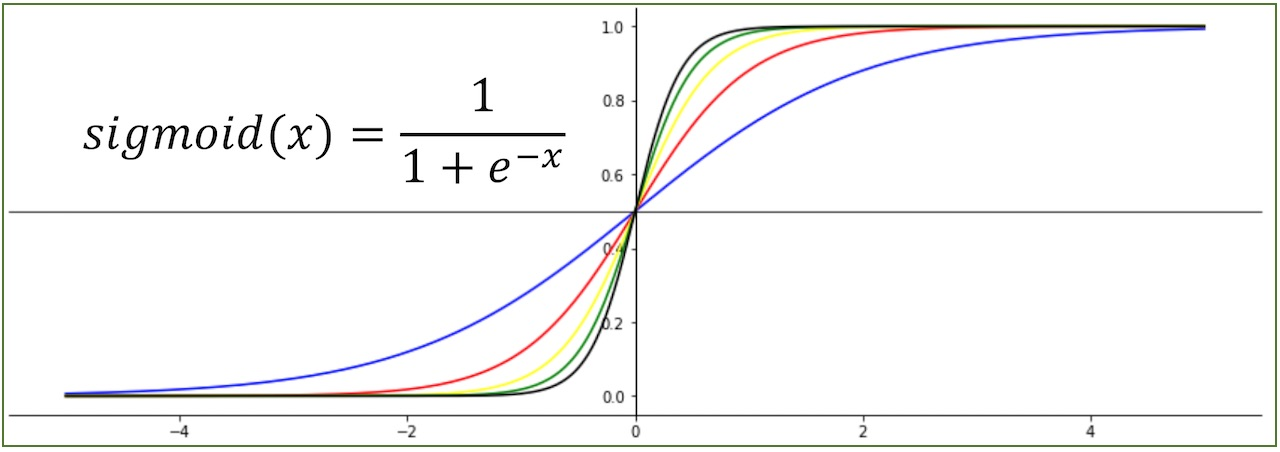


##### 미분한 시그모이드 함수

$\sigma'(x) = \sigma(x) (1 - \sigma(x))$


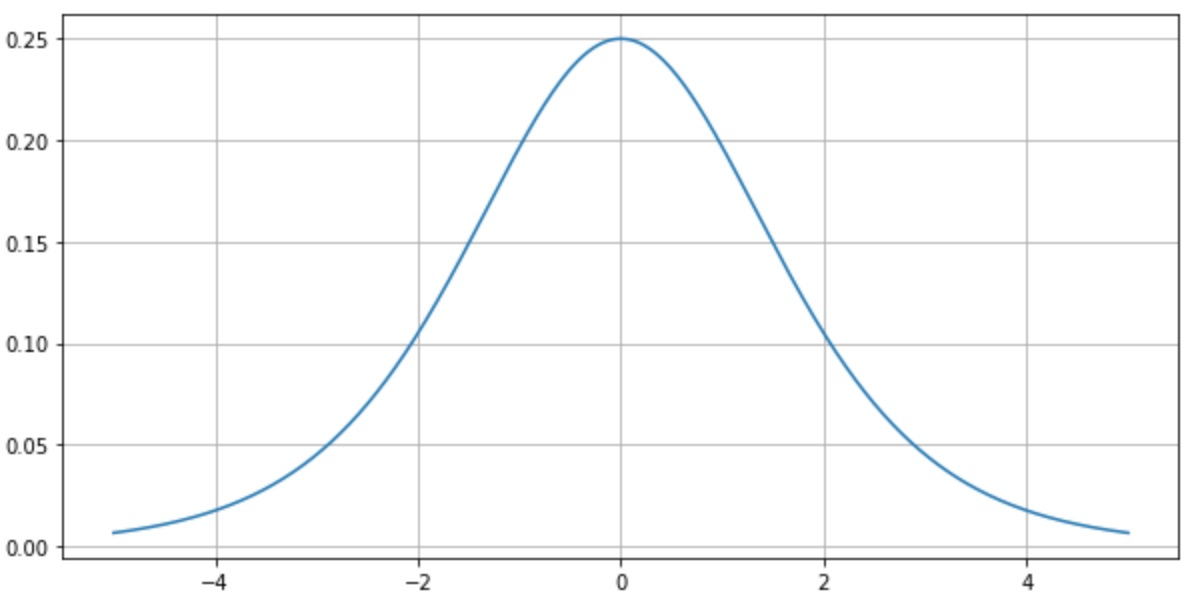



```
Q1. sigmoid(0)의 값은?
`답 : 0.5`
Q2. sigmoid(큰 양수)는 0에 가까운가 1에 가까운가?
`답 : 1`
Q3. sigmoid의 미분 공식에서 필요한 것은? (forward 결과 or 입력값)
`답 : forward 결과
```

In [4]:
import math

class Sigmoid:
    def __init__(self):
        self.output = None  # forward 결과 저장!

    def forward(self, x):
        output = []

        for i in range(len(x.data)):
            row = []
            for j in range(len(x.data[0])):
                val = x.data[i][j]
                sig = 1.0 / (1.0 + math.exp(-val))  
                row.append(sig)                      
            output.append(row)                       

        self.output = output
        return Tensor(output)

    def backward(self, grad_output):
        grad_input_data = []

        for i in range(len(grad_output.data)):
            row = []
            for j in range(len(grad_output.data[0])):
                out = self.output[i][j]
                grad = grad_output.data[i][j] * out * (1.0 - out)
                row.append(grad)
            grad_input_data.append(row)

        return Tensor(grad_input_data)

In [5]:
sigmoid = Sigmoid()

x = Tensor([[0.0, 2.0], [-2.0, 1.0]])
y = sigmoid.forward(x)

print("Forward:")
print(y.data)  
# 예상: [[0.5, ~0.88], [~0.12, ~0.73]]

print("\nStored output:")
print(sigmoid.output)

# Backward
grad_out = Tensor([[1.0, 1.0], [1.0, 1.0]])
grad_in = sigmoid.backward(grad_out)

print("\nBackward:")
print(grad_in.data)
# 예상: [[0.25, ~0.10], [~0.10, ~0.19]]

Forward:
[[0.5, 0.8807970779778823], [0.11920292202211755, 0.7310585786300049]]

Stored output:
[[0.5, 0.8807970779778823], [0.11920292202211755, 0.7310585786300049]]

Backward:
[[0.25, 0.10499358540350662], [0.1049935854035065, 0.19661193324148185]]
